<a href="https://colab.research.google.com/github/nlim23/MAT421/blob/main/AbalonesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION


Abalones are basically marine snails with beautifully vibrant shells that are found in warm seas. Like many marine life, these creatures are facing challenges like overfishing and environmental changes. Currently white and black abalones are the ones listed as endangered.

Abalones are very important supporters of the marine ecosystem. They eat algaes, which helps control algae growth and helps maintain a healthy ecosystem. The population helps indicate the environmental changes in the habitat. Even the dead abalones give shelter to other organisms through their shells. They are prey for many predators in the ocean like crabs, sea otters, starfish, fish and their main predator, humans.

The abalone meat is highly valued in the food world, but these species are facing extinction due to their low reproduction rates and unique mating habits. They are able to reproduce when they become 4 to 6 years old and can live up to about 40 years. This project aims to identify the age of an abalone based on other features, rather than the old time consuming method of cutting and counting the number of rings, which ultimately kills the abalone.  


#MATH METHOD



The numerical method used from this course will be linear regression that creates a linear function to predict the age of the abalone based on other features in hopes of predicting the age without killing the endangered species.

Linear regression has two categories: simple and multiple. Simple regression uses only one independent variable and this is the method used in this project. Multiple regression uses more than 2 independent variables in the model that predicts the dependent variable. In simple regression, the function is model by

$Y = \beta_0 + \beta_1*x$

or more commonly known as

$Y = b + a*x$.


$\beta_0$ or $a$ is known as the y-intercept

$\beta_1$ or $b$ is known as the slope of the line


#IMPLEMENTATION


### Abalone Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import optimize
from sklearn.metrics import r2_score

In [ ]:
import csv
with open('abalone.csv', 'r') as file:
    reader = csv.reader(file)

In [ ]:
abalone = pd.read_csv('abalone.csv')
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Currently in order to know the age of the abalone, one must count the number of the rings and then add 1.5 to find the age.

In [ ]:
abalone['Age'] = abalone['Rings'] + 1.5
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


### Graphs

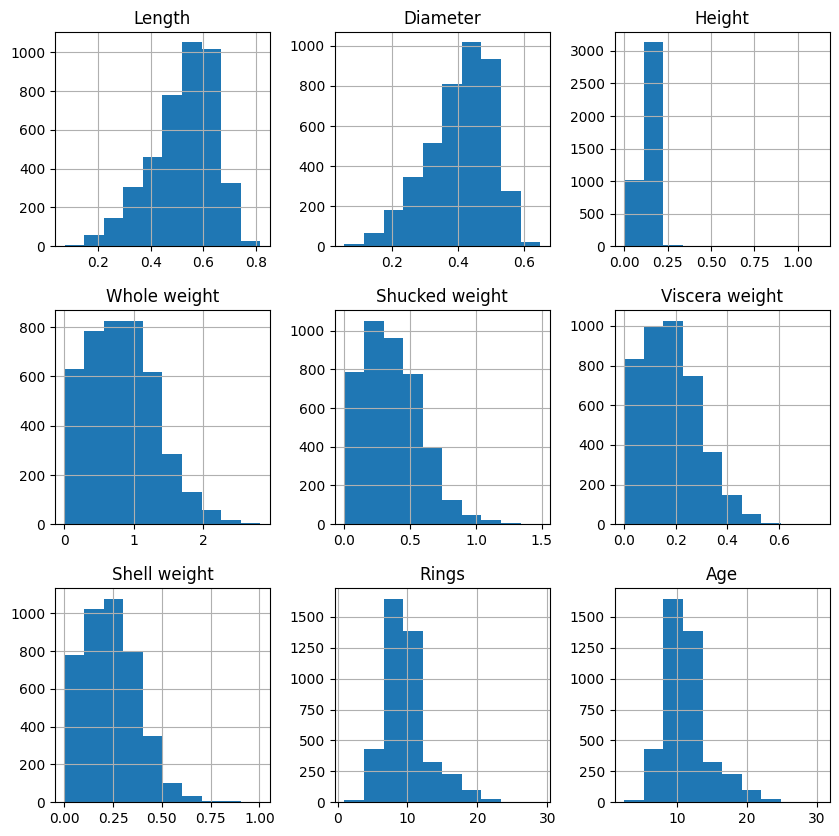

In [ ]:
abalone.hist(figsize=(10, 10))
plt.show()

Many of the histograms seemed to be skewed to the right, implying that there are outliers or less data. Many of which are based on the abalones weight, this could mean that very few abalones survive to reach this weight or they cannot support this weight due other factors. The only two histograms that are skewed to the left are length and diameter.

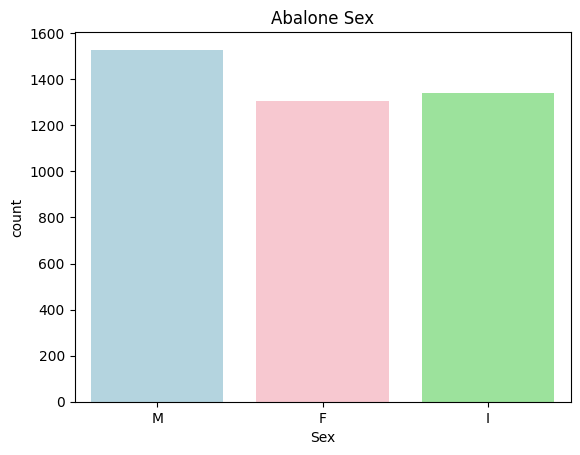

In [ ]:
sns.countplot(x = 'Sex', hue = 'Sex', data = abalone, palette = ['lightblue', 'pink', 'lightgreen'])

plt.title('Abalone Sex')
plt.show()

abalone['Sex'].value_counts()

male = abalone[abalone['Sex'] == 'M']
female = abalone[abalone['Sex'] == 'F']
infant = abalone[abalone['Sex'] == 'I']


Another factor in determining their age is their sex, it is possible that their sex contributes differently to their physical characteristics that are used to make the model. It seems that there are almost an equal number of males, females and infants. There seems to be slightly more males compared to females and infants.

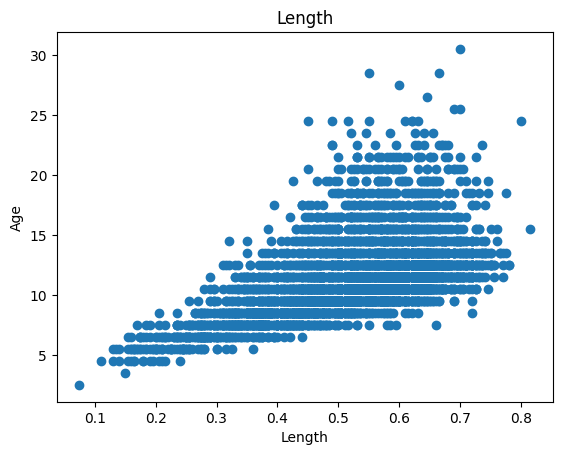

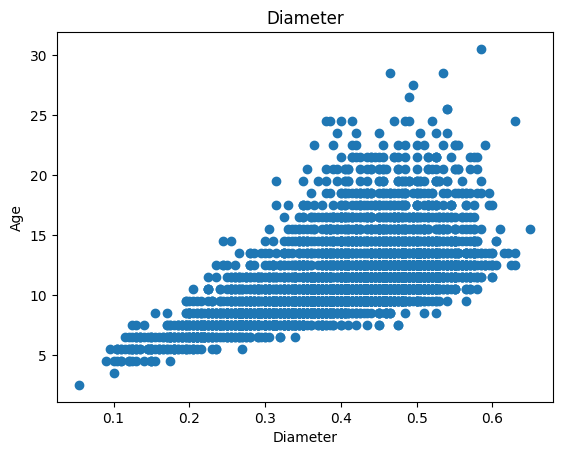

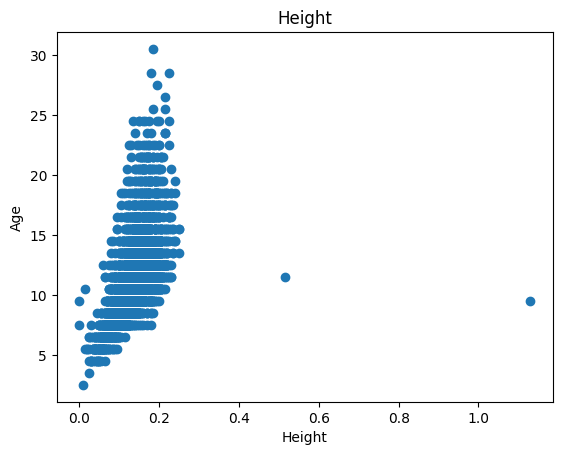

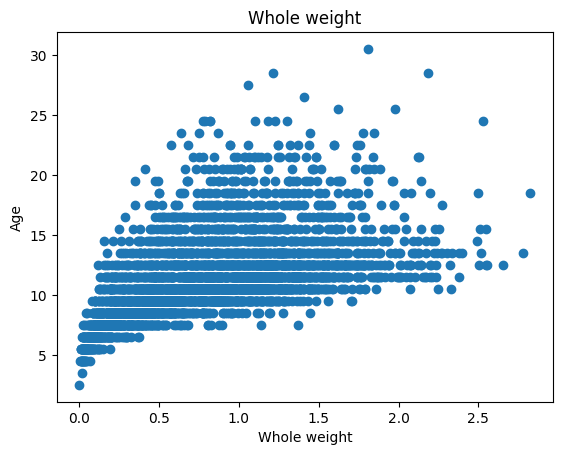

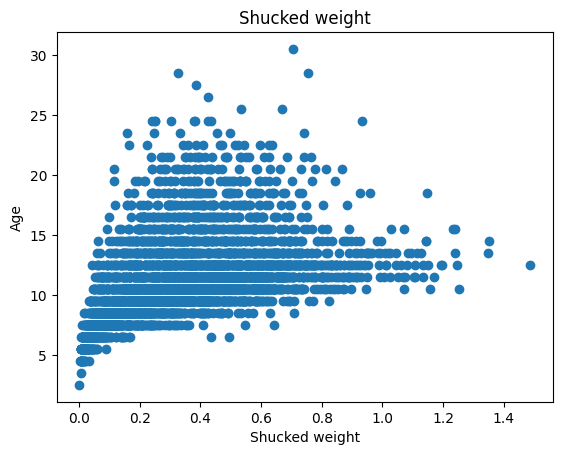

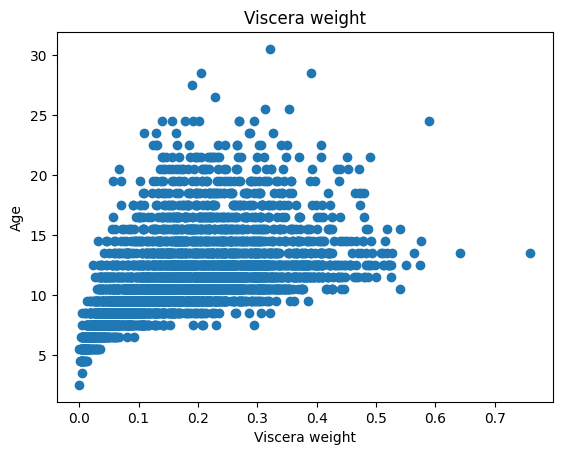

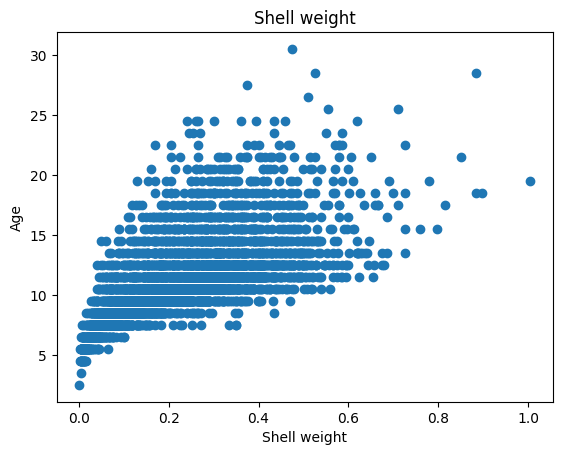

In [ ]:
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
for colum in columns:
    plt.scatter(abalone[colum], abalone['Age'])
    plt.title(colum)
    plt.xlabel(colum)
    plt.ylabel('Age')
    plt.show()


Length and Diameter scatterplots almost look linear until the abalones become larger. The scatter plot represents a sideways cone with the smaller end pointing to the origin.

Height looks more like a diamond shape with two extreme outliers on the right side of the graph, meaning two abalone of about the age of 10 have a height of 0.5 and 1.1 mm. This could mess up the model and may need to remove the outliers.

All the scatter plots of weights resemble a logistic growth, where it grows exponentially at first but unlike logistic growth they all scatter out dramatically.



### Correlation

Correlation is the measure of how two sets of data are related. It is important to choose a pair that is highly correlated in order to make a good prediction model. Correlation can range from -1 to 1. So this means that 0 is no correlation, -1 means negative linear correlation and 1 is positive linear correlation.

In [ ]:
abalone[columns + ['Age']].corr()['Age']

,Age
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Age,1.000000


The highest correlation between age and the characteristics is shell weight at 0.627 and diameter at 0.574. After looking at the scatterplots, height stands out with the worst outliers. Just in case, I took out the outliers in height and tested the correlation one more time.

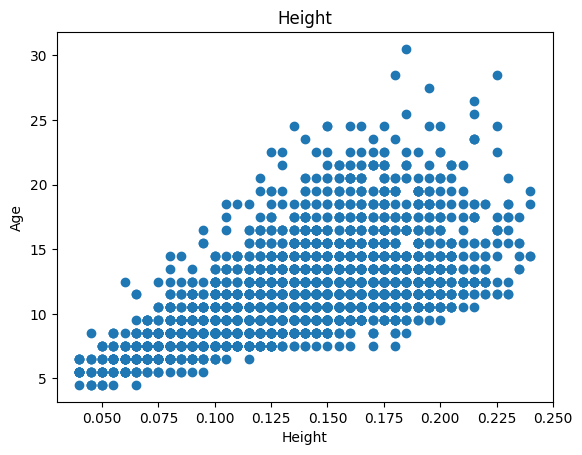

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,0.525718,0.409262,0.139771,0.831820,0.360657,0.181240,0.239695,9.964561,11.464561
std,0.117364,0.097097,0.037490,0.486551,0.220246,0.108681,0.138189,3.202053,3.202053
min,0.135000,0.105000,0.040000,0.015500,0.005000,0.000500,0.005000,3.000000,4.500000
25%,0.450000,0.350000,0.115000,0.447000,0.188000,0.094500,0.130875,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.802500,0.337500,0.171000,0.235000,10.000000,11.500000
75%,0.615000,0.480000,0.165000,1.154125,0.503125,0.253125,0.329625,11.000000,12.500000
max,0.800000,0.630000,0.240000,2.825500,1.488000,0.641500,1.005000,29.000000,30.500000


In [ ]:
Q1 = abalone['Height'].quantile(0.25)
Q3 = abalone['Height'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
abalone = abalone[(abalone['Height'] >= lower_bound) & (abalone['Height'] <= upper_bound)]

plt.scatter(abalone['Height'], abalone['Age'])
plt.title('Height')
plt.xlabel('Height')
plt.ylabel('Age')
plt.show()

abalone.describe()

In [ ]:
abalone[columns + ['Age']].corr()['Age']

,Age
Length,0.544745
Diameter,0.563482
Height,0.600984
Whole weight,0.533563
Shucked weight,0.412336
Viscera weight,0.497118
Shell weight,0.622400
Age,1.000000


The best two correlated pairs with age are height at 0.6 and still shell weight at 0.622. I wanted to make one linear regression model based on a characteristic that can be examined without opening up on the abalone. Then another model that uses the best correlated pair.

###Analyzing the Linear Regression Models

When analyzing for the best simple regression model, we must also look at the mean squared error. The mean squared error measures the averaged squared difference between the true values and the predicted values. So the lower the value, the better the accuracy of the linear regression model is. The higher the MSE is, then the prediction model is further away from the true value.

The $R^2$ is the coefficient of determination and it represents how accurate the regression model is compared to the averaged value of y. The value of $R^2$ can range from 0 to 1 and helps indicate how good the regression model is in predicting the value of y, but it is not always accurate. Typically a lower value of $R^2$ indicates that the variables are more independent of each other and cannot predict the value of one variable from the other. A higher value of $R^2$ shows that the variables are dependent on each other and thus one variable can reliably predict the other variable.

###Predicting the Age of an Abalone based on Height

In [ ]:
x = abalone['Height']
y = abalone['Age']
A = np.vstack([x, np.ones(len(x))]).T

coefficent_height = np.linalg.lstsq(A, y, rcond=None)[0]
print('The coefficent for height is', coefficent_height)

a_height = coefficent_height[0]
b_height = coefficent_height[1]
print('Age = ', a_height, '* Height + ', b_height)

pred_age_with_height = a_height * x + b_height

MSE_height = np.mean((y - pred_age_with_height)**2)
print('MSE for height is', MSE_height)
# The lower the MSE, the better bc the spread of data is smaller and confident

R2_sklearn = r2_score(y, pred_age_with_height)
print(f"R²: {R2_sklearn}")

The coefficent for height is [51.33045136  4.29005405]
Age =  51.33045135523378 * Height +  4.290054054430105
MSE for height is 6.5483174976805385
R²: 0.3611816836337697


Here, we can see that the linear regression model for predicting the age of an abalone based on the height is <center>$Age = 51.3304 * Height + 4.29$.</center>


The model does make sense since the taller the abalone, the older the abalone must be. The coefficients are also logical in the data set,because the tallest abalone is 0.24 mm. The only part that does not make sense is when height is equal to 0, the model implies that the age of the abalone must be 4.29 years old.  

The MSE for the first model based on height is 6.548. The MSE is showing that the model is okay, taking in consideration that the mean age of an abalone in this data set is 11.46 years.

The value of $R^2$ for using height to predict age is 0.3611 and it can be interpreted as 36.11% of the variation in height can be explained by age. This is a moderately weak number and shows that the model could be better.   


###Predicting the Age of an Abalone based on Shell Weight

In [ ]:
x = abalone['Shell weight']
y = abalone['Age']
A = np.vstack([x, np.ones(len(x))]).T

coefficent_shell = np.linalg.lstsq(A, y, rcond=None)[0]
print('The coefficent for shell weight is', coefficent_shell)

a_shellweight = coefficent_shell[0]
b_shellweight = coefficent_shell[1]
print('Age = ', a_shellweight, '* Shell weight + ', b_shellweight)

pred_age_with_shellweight = a_shellweight * x + b_shellweight

MSE_shellweight = np.mean((y - pred_age_with_shellweight)**2)
print('MSE for shell weight is', MSE_shellweight)

R2_sklearn = r2_score(y, pred_age_with_shellweight)
print(f"R²: {R2_sklearn}")

The coefficent for shell weight is [14.42201433  8.00768298]
Age =  14.422014328532057 * Shell weight +  8.007682976811484
MSE for shell weight is 6.279747368810596
R²: 0.38738192783569303


In this case, the model for predicting the age of an abalone based on shell weight is

<center>$Age = 14.4220 * shell$ $weight + 8.0076$ </center>

Overall, the model makes sense since the heavier the weight of the shell is then the older the abalone must be. The coefficient makes sense since the equation deals with variables that are smaller than 1.005. When the shell weight is 0 is when the equation starts losing sense, the age of an abalone cannot be 8 years old when the shell weight is 0 grams.

The MSE for the second model is 6.2797 and once again it shows that the model is alright. Compared to the first model, this model is better only by about 0.2 units.

The value $R^2$ for the second model is 0.3873 and again the model is only slightly better than the first one. This is still a moderately weak number and the model could be so much better.

###Conclusion



The conclusion of this project is that a simple linear regression model is not a good model for predicting the age of abalones.
Perhaps a multiple regression model would work better or a non-linear regression model. Out of the two models created, I would choose the one based on height because the goal of this project was to create a method in identifying the age without hurting the endangered species.


#DATA

https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset


#REFERENCES

https://www.britannica.com/animal/gastropod

https://oceaninfo.com/animals/abalone/

https://www.montereybayaquarium.org/animals/animals-a-to-z/abalone


https://www.fisheries.noaa.gov/species/white-abalone

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html

https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/

https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/



